In [1]:
!pip install numpy pandas matplotlib watermark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.0 MB/s eta 0:00:00


In [2]:
%load_ext watermark
%watermark -v -p numpy,pandas,matplotlib

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

numpy     : 1.25.2
pandas    : 2.0.3
matplotlib: 3.7.1



In [3]:
!wget https://raw.githubusercontent.com/Lightning-AI/dl-fundamentals/main/unit02-pytorch-tensors/2.6-revisiting-perceptron/perceptron_toydata-truncated.txt -O perceptron_toydata-truncated.txt

--2024-04-27 10:39:24--  https://raw.githubusercontent.com/Lightning-AI/dl-fundamentals/main/unit02-pytorch-tensors/2.6-revisiting-perceptron/perceptron_toydata-truncated.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 268 [text/plain]
Saving to: ‘perceptron_toydata-truncated.txt’

perceptron_toydata- 100%[===================>]     268  --.-KB/s    in 0s      

2024-04-27 10:39:25 (4.76 MB/s) - ‘perceptron_toydata-truncated.txt’ saved [268/268]



In [50]:
import pandas as pd

df = pd.read_csv("perceptron_toydata-truncated.txt", sep="\t")
x_train = df[['x1', 'x2']].values
y_train = df['label'].values

In [51]:
x_train.shape

(100, 2)

In [52]:
y_train.shape

(100,)

In [53]:
import numpy as np
np.bincount(y_train)

array([50, 50])

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

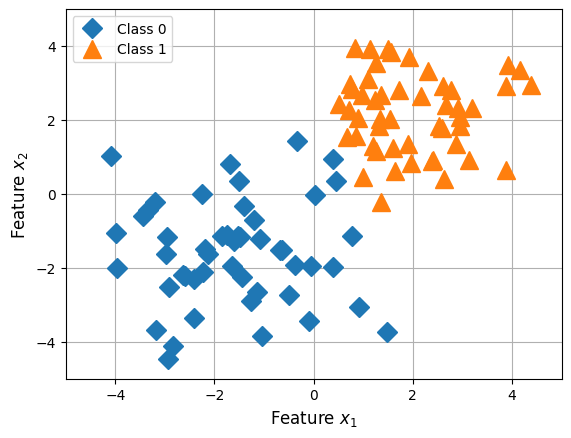

In [54]:
plt.plot(
    x_train[y_train==0, 0],
    x_train[y_train==0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0"
)

plt.plot(
    x_train[y_train==1, 0],
    x_train[y_train==1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1"
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

In [10]:
class Perceptron:
  def __init__(self, num_features):
    self.num_features = num_features
    self.weights = [0.0 for _ in range(num_features)]
    self.bias = 0.0

In [11]:
ppn = Perceptron(num_features=2)

In [12]:
ppn.weights

[0.0, 0.0]

In [13]:
ppn.bias

0.0

In [14]:
class Perceptron:
  def __init__(self, num_features):
    self.num_features = num_features
    self.weights = [0.0 for _ in range(num_features)]
    self.bias = 0.0

  def forward(self, features):
    weighted_sum_z = self.bias
    for i, _ in enumerate(self.weights):
      weighted_sum_z += features[i] * self.weights[i]

    if weighted_sum_z > 0.0:
      prediction = 1
    else:
      prediction = 0

    return prediction

In [15]:
ppn = Perceptron(num_features=2)
x = [1.1, 2.1]
ppn.forward(x)

0

In [16]:
import random

In [55]:
class Perceptron:
  def __init__(self, num_features, learning_rate=1.0):
    self.num_features = num_features
    # Initialize the model parameters with small random numbers instead of 0’s
    self.weights = [random.uniform(-0.5, 0.5) for _ in range(num_features)]
    self.bias = random.uniform(-0.5, 0.5)
    self.learning_rate = learning_rate

  def forward(self, features):
    weighted_sum_z = self.bias
    for i, _ in enumerate(self.weights):
      weighted_sum_z += features[i] * self.weights[i]

    if weighted_sum_z > 0.0:
      prediction = 1
    else:
      prediction = 0

    return prediction

  def update(self, features, true_y):
    prediction = self.forward(features)
    error = true_y - prediction
    self.bias += self.learning_rate * error
    for i, _ in enumerate(self.weights):
      self.weights[i] += self.learning_rate * error * features[i]

    return error

In [18]:
ppn = Perceptron(num_features=2)
ppn.forward(x)
ppn.update(x, true_y=1)

1

In [19]:
print(f"""Model Parameters:
  Weights: {ppn.weights}
  Bias: {ppn.bias}""")

Model Parameters:
  Weights: [0.7274760375651405, 1.8610039606470625]
  Bias: 1.303469277798684


In [56]:
def train(model, all_x, all_y, epochs):
  for epoch in range(epochs):
    error_count = 0
    for features, true_y in zip(all_x, all_y):
      error = model.update(features, true_y)
      error_count += abs(error)

    print(f"Epoch {epoch+1}, Errors: {error_count}")

    if error_count == 0: # Add early-stopping to make the Perceptron more efficient
      break

In [57]:
ppn = Perceptron(num_features=2, learning_rate=0.9)
train(model=ppn, all_x=x_train, all_y=y_train, epochs=6)

Epoch 1, Errors: 4
Epoch 2, Errors: 1
Epoch 3, Errors: 0


In [58]:
def compute_accuracy(model, all_x, all_y):
  correct = 0.0
  for features, true_y in zip(all_x, all_y):
    prediction = model.forward(features)
    correct += int(prediction == true_y)

  return correct / len(all_y)

In [59]:
train_acc = compute_accuracy(ppn, x_train, y_train)
train_acc

1.0

In [60]:
print(f"Accuracy: {train_acc*100}%")

Accuracy: 100.0%


In [61]:
def plot_boundary(model):
  w1, w2 = model.weights[0], model.weights[1]
  b = model.bias

  x1_min = -20
  x2_min = (-(w1 * x1_min) - b) / w2

  x1_max = 20
  x2_max = (-(w1 * x1_max) - b) / w2

  return x1_min, x1_max, x2_min, x2_max

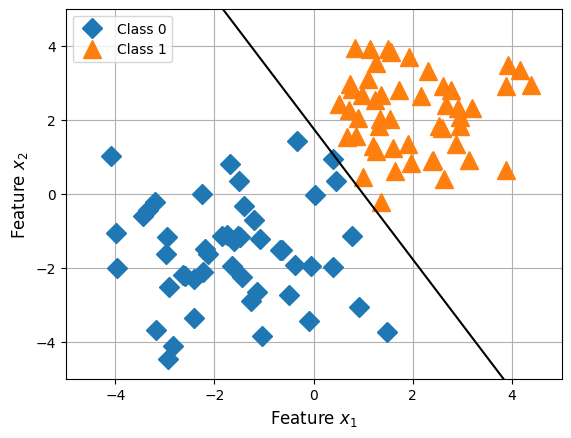

In [62]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)
plt.plot(
    x_train[y_train==0, 0],
    x_train[y_train==0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0"
)

plt.plot(
    x_train[y_train==1, 0],
    x_train[y_train==1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1"
)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()